# Original Code:


Input: Height (cm) --> 125
Input: Weight (kg) --> 75

Fuzzy - Step:

1. Fuzzification:

Height
pendek = 0.92
jangkung = 0.08

Weight
ringan = 0
sedang = 0.83
berat = 0.17

2. Find the minimum value -> compared of 2 imf:

min. height(pendek = 0.92) and weight(ringan = 0) is 0
min. height(pendek = 0.92) and weight(sedang = 0) is 0.83
min. height(pendek = 0.92) and weight(berat = 0) is 0.17
min. height(jangkung = 0.08) and weight(ringan = 0.83) is 0
min. height(jangkung = 0.08) and weight(sedang = 0.83) is 0.08
min. height(jangkung = 0.08) and weight(berat = 0.83) is 0.08

3. Rule base -> if <height> and <weight> then <body cond.>

Height\Weight | RINGAN   | SEDANG   | BERAT   
PENDEK        | Ideal    | C. Ideal | T. Ideal
JANGKUNG      | T. Ideal | C. Ideal | Ideal   

Height\Weight | RINGAN | SEDANG | BERAT
PENDEK        | 0      | 0.83   | 0.17 
JANGKUNG      | 0      | 0.08   | 0.08 

4. Find maximum value of rule

tidak ideal = 0.17
cukup ideal = 0.83
ideal = 0.08

5. Find defuzzif

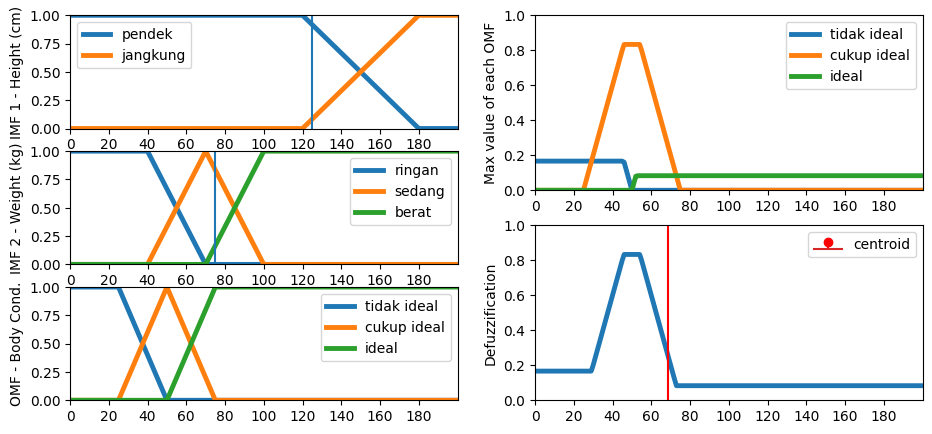

In [10]:
"""
Fuzzy Logic python code (without Scikit Lib.), created for "Fundamental of Intelligent System" Class, BME.
FIS --> using Mamdani max - min method.
Defuzzification --> using centroid.
Code is based on an example to find body condition, with 2 inputs (height and weight).
(c) AS. - 2024
"""

import matplotlib.pyplot as plt
import numpy as np


class main_fuzzy:
    def __init__(self):
        self.x_axis_start = 0
        self.x_axis_finish = 200
        self.x_axis_range = np.arange(self.x_axis_finish - self.x_axis_start)  # x axis

        self.label1 = ['pendek', 'jangkung']  # linguistic term for imf 1
        self.label2 = ['ringan', 'sedang', 'berat']  # linguistic term for imf 2
        self.label3 = ['tidak ideal', 'cukup ideal', 'ideal']  # linguistic term for omf

        self.x_imf1 = [[120, 120, 180], [120, 180, 180]]  # imf 1 value
        self.x_imf2 = [[40, 40, 70], [40, 70, 100], [70, 100, 100]]  # imf 2 value
        self.x_omf = [[25, 25, 50], [25, 50, 75], [50, 75, 75]]  # omf value

        # self.in_1 = float(input('Please specify your input - Height (cm) (range 0-200): '))
        # self.in_2 = float(input('Please specify your input - Weight (kg) (range 0-200): '))
        self.in_1 = 125     # input value for imf 1
        self.in_2 = 75      # input value for imf 2
        print("\nInput: Height (cm) --> " + str(self.in_1))
        print("Input: Weight (kg) --> " + str(self.in_2))

        self.min_x = [0] * (len(self.x_imf1) * len(self.x_imf2))
        self.miu_omf = [0] * len(self.x_omf)
        self.miu_x_omf = [[0] * self.x_axis_finish for i in range(len(self.x_omf))]
        self.miu_omf_final = [0] * self.x_axis_finish

        self.main()
        self.plotting()

    def main(self):
        self.miu_x_imf1_plt = self.find_miu(self.x_imf1, self.x_axis_start, self.x_axis_finish, True,
                                                0)  # plot overall imf 1
        self.miu_x_imf2_plt = self.find_miu(self.x_imf2, self.x_axis_start, self.x_axis_finish, True,
                                             0)  # plot overall imf 2
        self.miu_x_omf_plt = self.find_miu(self.x_omf, self.x_axis_start, self.x_axis_finish, True,
                                             0)  # plot overall omf

        print("\nFuzzy - Step:")
        print('\n1. Fuzzification:')
        self.miu_x_imf1 = self.find_miu(self.x_imf1, self.x_axis_start, self.x_axis_finish, False,
                                            self.in_1)  # fuzzification --> get fuzzy val. imf 1
        self.miu_x_imf2 = self.find_miu(self.x_imf2, self.x_axis_start, self.x_axis_finish, False,
                                         self.in_2)  # fuzzification --> get fuzzy val. imf 2
        print('\nHeight')
        for i in range(2):
            print(str(self.label1[i]) + ' = ' + str(round(self.miu_x_imf1[i], 2)))
        print('\nWeight')
        for i in range(3):
            print(str(self.label2[i]) + ' = ' + str(round(self.miu_x_imf2[i], 2)))

        print('\n2. Find the minimum value -> compared of 2 imf:\n')
        l = 0
        for i in range(len(self.x_imf1)):
            for j in range(len(self.x_imf2)):
                self.min_x[l] = min(self.miu_x_imf1[i], self.miu_x_imf2[j])     # min value of 2 imf
                print('min. height(' + str(self.label1[i]) + ' = ' + str(
                    round(self.miu_x_imf1[i], 2)) + ') and weight(' + str(self.label2[j]) + ' = ' + str(
                    round(self.miu_x_imf2[i], 2)) + ') is ' + str(round(self.min_x[l], 2)))
                l += 1

        print("\n3. Rule base -> if <height> and <weight> then <body cond.>\n")

        rule_base = [["Height\\Weight", "RINGAN", "SEDANG", "BERAT"], ["PENDEK", "Ideal", "C. Ideal", "T. Ideal"],
            ["JANGKUNG", "T. Ideal", "C. Ideal", "Ideal"]]

        col_widths = [max(len(str(item)) for item in col) for col in zip(*rule_base)]
        format_str = " | ".join([f"{{:<{width}}}" for width in col_widths])
        print(format_str.format(*rule_base[0]))
        for row in rule_base[1:]:
            print(format_str.format(*row))

        headers_print_dat = ["Height\\Weight", "RINGAN", "SEDANG", "BERAT"]
        print_dat = [
            ["PENDEK", round(self.min_x[0], 2), round(self.min_x[1], 2), round(self.min_x[2], 2)],
            ["JANGKUNG", round(self.min_x[3], 2), round(self.min_x[4], 2), round(self.min_x[5], 2)],
        ]

        col_widths = [max(len(str(item)) for item in col) for col in zip(*([headers_print_dat] + print_dat))]
        format_str = " | ".join([f"{{:<{width}}}" for width in col_widths])

        print("\n" + format_str.format(*headers_print_dat))
        for row in print_dat:
            print(format_str.format(*row))

        print("\n4. Find maximum value of rule\n")
        self.miu_omf[0] = max(self.min_x[2], self.min_x[3])
        self.miu_omf[1] = max(self.min_x[1], self.min_x[4])
        self.miu_omf[2] = max(self.min_x[0], self.min_x[5])
        for i in range(len(self.x_omf)):
            print(str(self.label3[i]) + " = " + str(round(self.miu_omf[i], 2)))

        l = 0
        for i in self.miu_x_omf_plt:
            for j in range(len(i)):
                self.miu_x_omf[l][j] = i[j]
                if self.miu_x_omf[l][j] > self.miu_omf[l]:
                    self.miu_x_omf[l][j] = self.miu_omf[l]
            l += 1

        l = 0
        for i in (list(zip(*self.miu_x_omf[::-1]))):
            self.miu_omf_final[l] = max(i)      # max value of each rule
            l += 1

        print("\n5. Find defuzzification value\n")
        self.out_defuz = self.centroid()        # defuzzification to crisp output
        print("centroid = " + str(self.out_defuz))

    def find_miu(self, x_i, start, fin, cond, x_specific):  # (3 values of x, 0, 100, True/False, 0/input val.)
        if cond:
            miu = [[0] * fin for i in range(len(x_i))]

            j = 0
            for x in x_i:
                for i in range(start, fin):
                    if i <= x[0]:
                        if x[0] == x[1]:
                            miu[j][i] = 1
                        else:
                            miu[j][i] = 0
                    elif x[0] < i <= x[1]:
                        miu[j][i] = (i - x[0]) / (x[1] - x[0])
                    elif x[1] < i <= x[2]:
                        miu[j][i] = (i - x[2]) / (x[1] - x[2])
                    elif i > x[2]:
                        if x[1] == x[2]:
                            miu[j][i] = 1
                        else:
                            miu[j][i] = 0
                j += 1
            return miu  # 2D array
        else:
            miu = [0] * len(x_i)

            i = x_specific
            j = 0
            for x in x_i:
                if i <= x[0]:
                    if j == 0:
                        miu[j] = 1
                    else:
                        miu[j] = 0
                elif x[0] < i <= x[1]:
                    miu[j] = (i - x[0]) / (x[1] - x[0])
                elif x[1] < i <= x[2]:
                    miu[j] = (i - x[2]) / (x[1] - x[2])
                elif i > x[2]:
                    if j == len(x_i):
                        miu[j] = 1
                    else:
                        miu[j] = 0
                j += 1
            return miu  # 1D array

    def centroid(self):
        num, den = 0, 0
        for i in range(self.x_axis_finish):
            num += self.miu_omf_final[i] * i
            den += self.miu_omf_final[i]
        return num / den

    def plotting(self):
        plt.figure(figsize=(11, 5))
        ax1 = plt.subplot(3, 2, 1)      # plot imf 1
        ax1.set_xlim(xmin=self.x_axis_start, xmax=self.x_axis_finish)
        ax1.set_ylim(ymin=0, ymax=1)
        ax1.xaxis.set_ticks(np.arange(self.x_axis_start, self.x_axis_finish, 20))
        for i in range(len(self.x_imf1)):
            plt.plot(self.x_axis_range, self.miu_x_imf1_plt[i], linewidth=3.5, label=self.label1[i])
        plt.ylabel('IMF 1 - Height (cm)')
        plt.stem(self.in_1, 1.2)
        plt.legend()

        ax2 = plt.subplot(3, 2, 3)      # plot imf 2
        ax2.set_xlim(xmin=self.x_axis_start, xmax=self.x_axis_finish)
        ax2.set_ylim(ymin=0, ymax=1)
        ax2.xaxis.set_ticks(np.arange(self.x_axis_start, self.x_axis_finish, 20))
        for i in range(len(self.x_imf2)):
            plt.plot(self.x_axis_range, self.miu_x_imf2_plt[i], linewidth=3.5, label=self.label2[i])
        plt.ylabel('IMF 2 - Weight (kg)')
        plt.stem(self.in_2, 1.2)
        plt.legend()

        ax3 = plt.subplot(3, 2, 5)      # plot omf
        ax3.set_xlim(xmin=self.x_axis_start, xmax=self.x_axis_finish)
        ax3.set_ylim(ymin=0, ymax=1)
        ax3.xaxis.set_ticks(np.arange(self.x_axis_start, self.x_axis_finish, 20))
        for i in range(len(self.x_omf)):
            plt.plot(self.x_axis_range, self.miu_x_omf_plt[i], linewidth=3.5, label=self.label3[i])
        plt.ylabel('OMF - Body Cond.')
        plt.legend()

        ax4 = plt.subplot(2, 2, 2)      # plot max value of each rule --> omf
        ax4.set_xlim(xmin=self.x_axis_start, xmax=self.x_axis_finish)
        ax4.set_ylim(ymin=0, ymax=1)
        ax4.xaxis.set_ticks(np.arange(self.x_axis_start, self.x_axis_finish, 20))
        l = 0
        for i in self.miu_x_omf:
            plt.plot(self.x_axis_range, i, linewidth=3.5, label=self.label3[l])
            l += 1
        plt.ylabel('Max value of each OMF')
        plt.legend()

        ax5 = plt.subplot(2, 2, 4)      # plot shape and crisp output
        ax5.set_xlim(xmin=self.x_axis_start, xmax=self.x_axis_finish)
        ax5.set_ylim(ymin=0, ymax=1)
        ax5.xaxis.set_ticks(np.arange(self.x_axis_start, self.x_axis_finish, 20))
        plt.plot(self.x_axis_range, self.miu_omf_final, linewidth=3.5)
        plt.ylabel('Defuzzification')
        plt.stem(self.out_defuz, 1.2, linefmt='r', label='centroid')
        plt.legend()
        plt.show()


main_fuzzy()

# Modified Code


Input: Height (cm) --> 180
Input: Weight (kg) --> 40

Fuzzy - Step:

1. Fuzzification:

Height
pendek = -0.0
jangkung = 1.0

Weight
ringan = 1
sedang = 0
berat = 0

2. Find the minimum value -> compared of 2 imf:

min. height(pendek = -0.0) and weight(ringan = 1) is -0.0
min. height(pendek = -0.0) and weight(sedang = 0) is -0.0
min. height(pendek = -0.0) and weight(berat = 0) is -0.0
min. height(jangkung = 1.0) and weight(ringan = 1) is 1.0
min. height(jangkung = 1.0) and weight(sedang = 0) is 0
min. height(jangkung = 1.0) and weight(berat = 0) is 0

3. Rule base -> if <height> and <weight> then <body cond.>

Height\Weight | RINGAN   | SEDANG   | BERAT   
PENDEK        | Ideal    | C. Ideal | T. Ideal
JANGKUNG      | T. Ideal | C. Ideal | Ideal   

Height\Weight | RINGAN | SEDANG | BERAT
PENDEK        | -0.0   | -0.0   | -0.0 
JANGKUNG      | 1.0    | 0      | 0    

4. Find maximum value of rule

tidak ideal = 1.0
cukup ideal = -0.0
ideal = -0.0

5. Find defuzzification value

centro

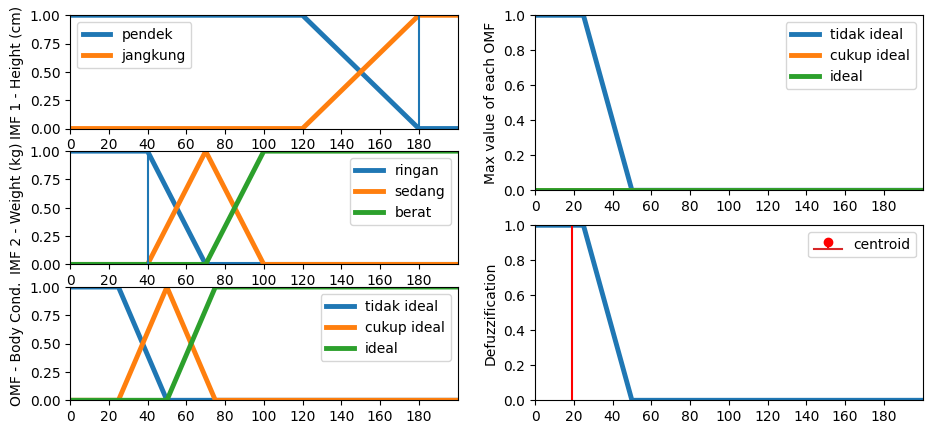


Input: Height (cm) --> 120
Input: Weight (kg) --> 70

Fuzzy - Step:

1. Fuzzification:

Height
pendek = 1
jangkung = 0

Weight
ringan = -0.0
sedang = 1.0
berat = 0

2. Find the minimum value -> compared of 2 imf:

min. height(pendek = 1) and weight(ringan = -0.0) is -0.0
min. height(pendek = 1) and weight(sedang = 1.0) is 1
min. height(pendek = 1) and weight(berat = 0) is 0
min. height(jangkung = 0) and weight(ringan = -0.0) is 0
min. height(jangkung = 0) and weight(sedang = 1.0) is 0
min. height(jangkung = 0) and weight(berat = 0) is 0

3. Rule base -> if <height> and <weight> then <body cond.>

Height\Weight | RINGAN   | SEDANG   | BERAT   
PENDEK        | Ideal    | C. Ideal | T. Ideal
JANGKUNG      | T. Ideal | C. Ideal | Ideal   

Height\Weight | RINGAN | SEDANG | BERAT
PENDEK        | -0.0   | 1      | 0    
JANGKUNG      | 0      | 0      | 0    

4. Find maximum value of rule

tidak ideal = 0
cukup ideal = 1
ideal = -0.0

5. Find defuzzification value

centroid = 50.0


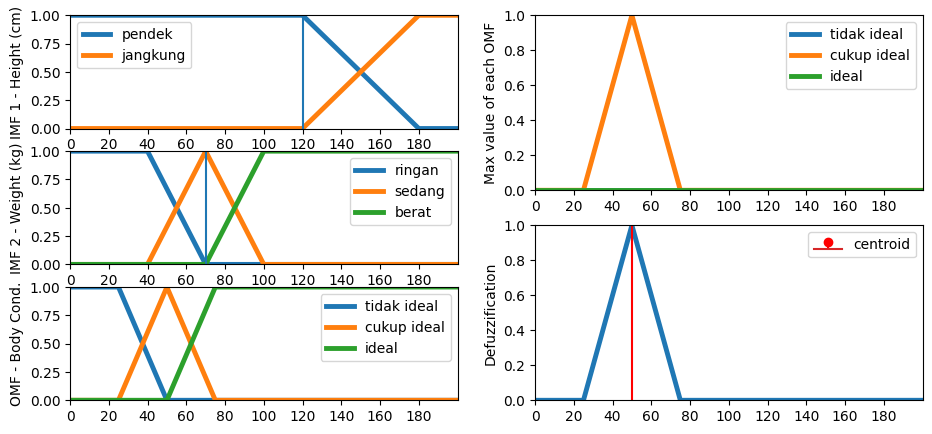


Input: Height (cm) --> 120
Input: Weight (kg) --> 40

Fuzzy - Step:

1. Fuzzification:

Height
pendek = 1
jangkung = 0

Weight
ringan = 1
sedang = 0
berat = 0

2. Find the minimum value -> compared of 2 imf:

min. height(pendek = 1) and weight(ringan = 1) is 1
min. height(pendek = 1) and weight(sedang = 0) is 0
min. height(pendek = 1) and weight(berat = 0) is 0
min. height(jangkung = 0) and weight(ringan = 1) is 0
min. height(jangkung = 0) and weight(sedang = 0) is 0
min. height(jangkung = 0) and weight(berat = 0) is 0

3. Rule base -> if <height> and <weight> then <body cond.>

Height\Weight | RINGAN   | SEDANG   | BERAT   
PENDEK        | Ideal    | C. Ideal | T. Ideal
JANGKUNG      | T. Ideal | C. Ideal | Ideal   

Height\Weight | RINGAN | SEDANG | BERAT
PENDEK        | 1      | 0      | 0    
JANGKUNG      | 0      | 0      | 0    

4. Find maximum value of rule

tidak ideal = 0
cukup ideal = 0
ideal = 1

5. Find defuzzification value

centroid = 130.8102189781022


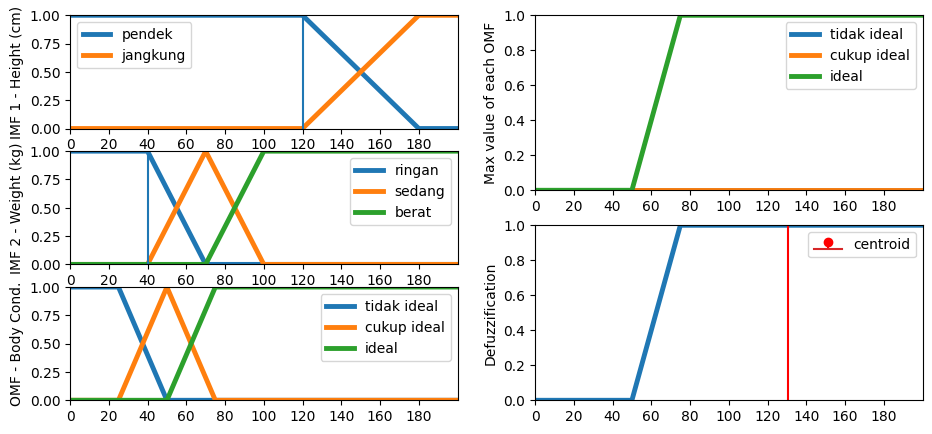

In [18]:
"""
Fuzzy Logic python code (without Scikit Lib.), created for "Fundamental of Intelligent System" Class, BME.
FIS --> using Mamdani max - min method.
Defuzzification --> using centroid.
Code is based on an example to find body condition, with 2 inputs (height and weight).
(c) AS. - 2024
"""

import matplotlib.pyplot as plt
import numpy as np


class main_fuzzy:
    def __init__(self):
        self.x_axis_start = 0
        self.x_axis_finish = 200
        self.x_axis_range = np.arange(self.x_axis_finish - self.x_axis_start)  # x axis

        self.label1 = ['pendek', 'jangkung']  # linguistic term for imf 1
        self.label2 = ['ringan', 'sedang', 'berat']  # linguistic term for imf 2
        self.label3 = ['tidak ideal', 'cukup ideal', 'ideal']  # linguistic term for omf

        self.x_imf1 = [[120, 120, 180], [120, 180, 180]]  # imf 1 value
        self.x_imf2 = [[40, 40, 70], [40, 70, 100], [70, 100, 100]]  # imf 2 value
        self.x_omf = [[25, 25, 50], [25, 50, 75], [50, 75, 75]]  # omf value

        # Define input values to maximize OMF for each linguistic term based on the fuzzy rules
        self.inputs = [
            # to maximize 'tidak ideal'
            (180, 40),

            # to maximize 'cukup ideal'
            (120, 70),

            # to maximize 'ideal'
            (120, 40),
        ]

        # Process each input set to verify the results
        for in_1, in_2 in self.inputs:
            self.in_1 = in_1  # input value for imf 1
            self.in_2 = in_2  # input value for imf 2
            print("\nInput: Height (cm) --> " + str(self.in_1))
            print("Input: Weight (kg) --> " + str(self.in_2))

            self.min_x = [0] * (len(self.x_imf1) * len(self.x_imf2))
            self.miu_omf = [0] * len(self.x_omf)
            self.miu_x_omf = [[0] * self.x_axis_finish for i in range(len(self.x_omf))]
            self.miu_omf_final = [0] * self.x_axis_finish

            self.main()
            self.plotting()

    def main(self):
        self.miu_x_imf1_plt = self.find_miu(self.x_imf1, self.x_axis_start, self.x_axis_finish, True,
                                            0)  # plot overall imf 1
        self.miu_x_imf2_plt = self.find_miu(self.x_imf2, self.x_axis_start, self.x_axis_finish, True,
                                            0)  # plot overall imf 2
        self.miu_x_omf_plt = self.find_miu(self.x_omf, self.x_axis_start, self.x_axis_finish, True,
                                           0)  # plot overall omf

        print("\nFuzzy - Step:")
        print('\n1. Fuzzification:')
        self.miu_x_imf1 = self.find_miu(self.x_imf1, self.x_axis_start, self.x_axis_finish, False,
                                        self.in_1)  # fuzzification --> get fuzzy val. imf 1
        self.miu_x_imf2 = self.find_miu(self.x_imf2, self.x_axis_start, self.x_axis_finish, False,
                                        self.in_2)  # fuzzification --> get fuzzy val. imf 2
        print('\nHeight')
        for i in range(2):
            print(str(self.label1[i]) + ' = ' + str(round(self.miu_x_imf1[i], 2)))
        print('\nWeight')
        for i in range(3):
            print(str(self.label2[i]) + ' = ' + str(round(self.miu_x_imf2[i], 2)))

        print('\n2. Find the minimum value -> compared of 2 imf:\n')
        l = 0
        for i in range(len(self.x_imf1)):
            for j in range(len(self.x_imf2)):
                self.min_x[l] = min(self.miu_x_imf1[i], self.miu_x_imf2[j])  # min value of 2 imf
                print('min. height(' + str(self.label1[i]) + ' = ' + str(
                    round(self.miu_x_imf1[i], 2)) + ') and weight(' + str(self.label2[j]) + ' = ' + str(
                    round(self.miu_x_imf2[j], 2)) + ') is ' + str(round(self.min_x[l], 2)))
                l += 1

        print("\n3. Rule base -> if <height> and <weight> then <body cond.>\n")

        rule_base = [["Height\\Weight", "RINGAN", "SEDANG", "BERAT"],
                     ["PENDEK", "Ideal", "C. Ideal", "T. Ideal"],
                     ["JANGKUNG", "T. Ideal", "C. Ideal", "Ideal"]]

        col_widths = [max(len(str(item)) for item in col) for col in zip(*rule_base)]
        format_str = " | ".join([f"{{:<{width}}}" for width in col_widths])
        print(format_str.format(*rule_base[0]))
        for row in rule_base[1:]:
            print(format_str.format(*row))

        headers_print_dat = ["Height\\Weight", "RINGAN", "SEDANG", "BERAT"]
        print_dat = [
            ["PENDEK", round(self.min_x[0], 2), round(self.min_x[1], 2), round(self.min_x[2], 2)],
            ["JANGKUNG", round(self.min_x[3], 2), round(self.min_x[4], 2), round(self.min_x[5], 2)],
        ]

        col_widths = [max(len(str(item)) for item in col) for col in zip(*([headers_print_dat] + print_dat))]
        format_str = " | ".join([f"{{:<{width}}}" for width in col_widths])

        print("\n" + format_str.format(*headers_print_dat))
        for row in print_dat:
            print(format_str.format(*row))

        print("\n4. Find maximum value of rule\n")
        self.miu_omf[0] = max(self.min_x[2], self.min_x[3])
        self.miu_omf[1] = max(self.min_x[1], self.min_x[4])
        self.miu_omf[2] = max(self.min_x[0], self.min_x[5])
        for i in range(len(self.x_omf)):
            print(str(self.label3[i]) + " = " + str(round(self.miu_omf[i], 2)))

        l = 0
        for i in self.miu_x_omf_plt:
            for j in range(len(i)):
                self.miu_x_omf[l][j] = i[j]
                if self.miu_x_omf[l][j] > self.miu_omf[l]:
                    self.miu_x_omf[l][j] = self.miu_omf[l]
            l += 1

        l = 0
        for i in (list(zip(*self.miu_x_omf[::-1]))):
            self.miu_omf_final[l] = max(i)  # max value of each rule
            l += 1

        print("\n5. Find defuzzification value\n")
        self.out_defuz = self.centroid()  # defuzzification to crisp output
        print("centroid = " + str(self.out_defuz))

    def find_miu(self, x_i, start, fin, cond, x_specific):  # (3 values of x, 0, 100, True/False, 0/input val.)
        if cond:
            miu = [[0] * fin for i in range(len(x_i))]

            j = 0
            for x in x_i:
                for i in range(start, fin):
                    if i <= x[0]:
                        if x[0] == x[1]:
                            miu[j][i] = 1
                        else:
                            miu[j][i] = 0
                    elif x[0] < i <= x[1]:
                        miu[j][i] = (i - x[0]) / (x[1] - x[0])
                    elif x[1] < i <= x[2]:
                        miu[j][i] = (i - x[2]) / (x[1] - x[2])
                    elif i > x[2]:
                        if x[1] == x[2]:
                            miu[j][i] = 1
                        else:
                            miu[j][i] = 0
                j += 1
            return miu  # 2D array
        else:
            miu = [0] * len(x_i)

            i = x_specific
            j = 0
            for x in x_i:
                if i <= x[0]:
                    if j == 0:
                        miu[j] = 1
                    else:
                        miu[j] = 0
                elif x[0] < i <= x[1]:
                    miu[j] = (i - x[0]) / (x[1] - x[0])
                elif x[1] < i <= x[2]:
                    miu[j] = (i - x[2]) / (x[1] - x[2])
                elif i > x[2]:
                    if j == len(x_i):
                        miu[j] = 1
                    else:
                        miu[j] = 0
                j += 1
            return miu  # 1D array

    def centroid(self):
        num, den = 0, 0
        for i in range(self.x_axis_finish):
            num += self.miu_omf_final[i] * i
            den += self.miu_omf_final[i]
        return num / den

    def plotting(self):
        plt.figure(figsize=(11, 5))
        ax1 = plt.subplot(3, 2, 1)  # plot imf 1
        ax1.set_xlim(xmin=self.x_axis_start, xmax=self.x_axis_finish)
        ax1.set_ylim(ymin=0, ymax=1)
        ax1.xaxis.set_ticks(np.arange(self.x_axis_start, self.x_axis_finish, 20))
        for i in range(len(self.x_imf1)):
            plt.plot(self.x_axis_range, self.miu_x_imf1_plt[i], linewidth=3.5, label=self.label1[i])
        plt.ylabel('IMF 1 - Height (cm)')
        plt.stem(self.in_1, 1.2)
        plt.legend()

        ax2 = plt.subplot(3, 2, 3)  # plot imf 2
        ax2.set_xlim(xmin=self.x_axis_start, xmax=self.x_axis_finish)
        ax2.set_ylim(ymin=0, ymax=1)
        ax2.xaxis.set_ticks(np.arange(self.x_axis_start, self.x_axis_finish, 20))
        for i in range(len(self.x_imf2)):
            plt.plot(self.x_axis_range, self.miu_x_imf2_plt[i], linewidth=3.5, label=self.label2[i])
        plt.ylabel('IMF 2 - Weight (kg)')
        plt.stem(self.in_2, 1.2)
        plt.legend()

        ax3 = plt.subplot(3, 2, 5)  # plot omf
        ax3.set_xlim(xmin=self.x_axis_start, xmax=self.x_axis_finish)
        ax3.set_ylim(ymin=0, ymax=1)
        ax3.xaxis.set_ticks(np.arange(self.x_axis_start, self.x_axis_finish, 20))
        for i in range(len(self.x_omf)):
            plt.plot(self.x_axis_range, self.miu_x_omf_plt[i], linewidth=3.5, label=self.label3[i])
        plt.ylabel('OMF - Body Cond.')
        plt.legend()

        ax4 = plt.subplot(2, 2, 2)  # plot max value of each rule --> omf
        ax4.set_xlim(xmin=self.x_axis_start, xmax=self.x_axis_finish)
        ax4.set_ylim(ymin=0, ymax=1)
        ax4.xaxis.set_ticks(np.arange(self.x_axis_start, self.x_axis_finish, 20))
        l = 0
        for i in self.miu_x_omf:
            plt.plot(self.x_axis_range, i, linewidth=3.5, label=self.label3[l])
            l += 1
        plt.ylabel('Max value of each OMF')
        plt.legend()

        ax5 = plt.subplot(2, 2, 4)  # plot shape and crisp output
        ax5.set_xlim(xmin=self.x_axis_start, xmax=self.x_axis_finish)
        ax5.set_ylim(ymin=0, ymax=1)
        ax5.xaxis.set_ticks(np.arange(self.x_axis_start, self.x_axis_finish, 20))
        plt.plot(self.x_axis_range, self.miu_omf_final, linewidth=3.5)
        plt.ylabel('Defuzzification')
        plt.stem(self.out_defuz, 1.2, linefmt='r', label='centroid')
        plt.legend()
        plt.show()


main_fuzzy()
